<a href="https://colab.research.google.com/github/BAEHOEUN/project-2025-2/blob/main/Your_Own_Analysis_Final_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Drive 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 8.84 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bashrc.biolab
./root/.condarc
./root/.profile
./root/.vimrc
--2025-06-12 08:26:35--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 1

In [3]:
!conda install -y subread

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    conda-25.5.1               |  py313h78bf25f_0         1.1 MB  conda-forge
    subread-2.0.1              |       h5bf99c6_1        22.8 MB  bioconda
    ------------------------------------------------------------
                                           Total:        24.1 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h5bf9

In [4]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


In [5]:
!sudo apt-get update
!sudo apt-get install subread

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,019 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,984 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,742

CLIP and ribosome enrichment

In [6]:
##FeatureCounts
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                           o CLIP-35L33G.bam                                ||
||                           o CLIP-let7d.bam                                 ||
||                           o CLIP-let7f-1.bam                               ||
||                           o CLIP-let7g.bam                    

In [7]:
import pandas as pd
import numpy as np

## 시작

In [8]:
# read-counts 데이터 로드
df_original = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
df_original.index = df_original.index.str.replace(r"\.\d+$", "", regex=True)  # 버전 제거
df_original.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLin28a.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,,
ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# 2. 라이브러리 사이즈 계산
clip_total = df_original["CLIP-35L33G.bam"].sum()
rna_total = df_original["RNA-control.bam"].sum()

rpf_siLin28a_total = df_original["RPF-siLin28a.bam"].sum()
rna_siLin28a_total = df_original["RNA-siLin28a.bam"].sum()

rpf_siLuc_total = df_original["RPF-siLuc.bam"].sum()
rna_siLuc_total = df_original["RNA-siLuc.bam"].sum()

In [10]:
# ENSG 유전자 ID에서 버전 정보 제거
df_original.index = df_original.index.str.replace(r"\.\d+$", "", regex=True)

In [11]:
# 3. CPM 계산 (정규화된 값)
df_original["clip_cpm"] = df_original["CLIP-35L33G.bam"] / clip_total * 1e6
df_original["rna_cpm"] = df_original["RNA-control.bam"] / rna_total * 1e6
df_original["clip_enrichment"] = df_original["clip_cpm"] / df_original["rna_cpm"]


df_original["ribo_siLin28a_cpm"] = df_original["RPF-siLin28a.bam"] / rpf_siLin28a_total * 1e6
df_original["rna_siLin28a_cpm"] = df_original["RNA-siLin28a.bam"] / rna_siLin28a_total * 1e6
df_original["ribo_siLuc_cpm"] = df_original["RPF-siLuc.bam"] / rpf_siLuc_total * 1e6
df_original["rna_siLuc_cpm"] = df_original["RNA-siLuc.bam"] / rna_siLuc_total * 1e6

df_original["rden_change"] = (df_original["ribo_siLin28a_cpm"] / df_original["rna_siLin28a_cpm"]) / \
                             (df_original["ribo_siLuc_cpm"] / df_original["rna_siLuc_cpm"])


df_original.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLin28a.bam,...,RPF-siLin28a.bam,RPF-siLuc.bam,clip_cpm,rna_cpm,clip_enrichment,ribo_siLin28a_cpm,rna_siLin28a_cpm,ribo_siLuc_cpm,rna_siLuc_cpm,rden_change
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,...,0,0,0.000000,0.000000,NaN,0.0,0.000000,0.0,0.000000,NaN
ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,...,0,0,0.000000,0.000000,NaN,0.0,0.000000,0.0,0.000000,NaN
ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,...,0,0,0.293450,0.192277,1.526185,0.0,0.081049,0.0,0.102577,NaN
ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,...,0,0,0.220087,0.000000,inf,0.0,0.000000,0.0,0.000000,NaN
ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0,0,0.000000,0.000000,NaN,0.0,0.000000,0.0,0.000000,NaN


In [12]:
# 4. 필터링 및 log2 변환
df_filtered = df_original[(df_original["clip_enrichment"] > 0) & (df_original["rden_change"] > 0)].copy()
df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered.dropna(inplace=True)

df_filtered["clip_log2"] = np.log2(df_filtered["clip_enrichment"] + 1e-3)
df_filtered["rden_log2"] = np.log2(df_filtered["rden_change"] + 1e-3)

df_filtered["clip_log2"] = np.log2(df_filtered["clip_enrichment"] + 1e-3)
df_filtered["rden_log2"] = np.log2(df_filtered["rden_change"] + 1e-3)

clip_median = df_filtered["clip_log2"].median()
df_filtered["clip_log2_centered"] = df_filtered["clip_log2"] - clip_median

rden_median = df_filtered["rden_log2"].median()
df_filtered["rden_log2_centered"] = df_filtered["rden_log2"] - rden_median

df_filtered.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLin28a.bam,...,clip_enrichment,ribo_siLin28a_cpm,rna_siLin28a_cpm,ribo_siLuc_cpm,rna_siLuc_cpm,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102343,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,0,0,0,0,...,0.824632,0.093509,16.777055,0.154652,16.104568,0.580406,-0.276429,-0.782382,0.313748,-0.569055
ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,0,0,0,0,...,2.289278,0.187018,0.648389,0.231978,0.512884,0.637707,1.195522,-0.646773,1.785699,-0.433446
ENSMUSG00000102269,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,0,0,0,2,...,0.041813,0.187018,2.269360,0.695933,1.128346,0.133615,-4.545798,-2.893091,-3.955621,-2.679763
ENSMUSG00000098104,chr1,4758157,4759626,-,1470,29,0,0,0,0,...,0.175632,0.187018,2.107263,0.541281,1.538653,0.252280,-2.501178,-1.981196,-1.911001,-1.767869
ENSMUSG00000103922,chr1,4841354,4842422,+,1069,183,0,0,0,41,...,0.734979,3.927376,7.537517,5.799439,10.257686,0.921590,-0.442264,-0.116239,0.147913,0.097088


In [15]:
# 5. 분석용 데이터 최종 구성
df_filtered["ensembl_gene_id"] = df_filtered.index

df_data_final = df_filtered[[
    "ensembl_gene_id","CLIP-35L33G.bam", "RNA-control.bam", "RPF-siLuc.bam", "RPF-siLin28a.bam",
    "clip_enrichment", "rden_change", "clip_log2", "rden_log2", "clip_log2_centered","rden_log2_centered"
]]
df_data_final.head()

,ensembl_gene_id,CLIP-35L33G.bam,RNA-control.bam,RPF-siLuc.bam,RPF-siLin28a.bam,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered
Geneid,,,,,,,,,,,
ENSMUSG00000102343,ENSMUSG00000102343,67,31,2,1,0.824632,0.580406,-0.276429,-0.782382,0.313748,-0.569055
ENSMUSG00000025902,ENSMUSG00000025902,6,1,3,2,2.289278,0.637707,1.195522,-0.646773,1.785699,-0.433446
ENSMUSG00000102269,ENSMUSG00000102269,8,73,9,2,0.041813,0.133615,-4.545798,-2.893091,-3.955621,-2.679763
ENSMUSG00000098104,ENSMUSG00000098104,29,63,7,2,0.175632,0.252280,-2.501178,-1.981196,-1.911001,-1.767869
ENSMUSG00000103922,ENSMUSG00000103922,183,95,75,42,0.734979,0.921590,-0.442264,-0.116239,0.147913,0.097088


In [16]:
# 6. 신뢰도 기준 필터링 (원하시면 선택적으로 사용)
df_high_confidence = df_data_final.copy()

df_high_confidence = df_data_final[
    (df_data_final["CLIP-35L33G.bam"] >= 10) &
    (df_data_final["RNA-control.bam"] >= 20) &
    (df_data_final["RPF-siLuc.bam"] >= 10) &
    (df_data_final["RPF-siLin28a.bam"] >= 10)
].copy()


# 출력 요약
print(f"총 {len(df_data_final)}개 유전자 중 기준을 만족하는 것은 {len(df_high_confidence)}개입니다.")

총 16201개 유전자 중 기준을 만족하는 것은 10683개입니다.


In [ ]:
df_high_confidence.head()

##GOA 및 UniProt

In [17]:
# GOA 및 UniProt 매핑 파일 로딩
goa_file = '/content/drive/MyDrive/binfo1-work/goa_mouse.gaf.gz'
mapping_file = '/content/drive/MyDrive/binfo1-work/MOUSE_10090_idmapping.dat.gz'

In [18]:
df_mapping = pd.read_csv(mapping_file, sep="\t", header=None, names=["UniProt_ID", "DB", "Ensembl_ID"])
df_mapping.head(20)

,UniProt_ID,DB,Ensembl_ID
0,Q60888,UniProtKB-ID,10D1B_MOUSE
1,Q60888,Gene_Name,Or10d1b
2,Q60888,Gene_Synonym,Mor224-8
3,Q60888,Gene_Synonym,Olfr149
4,Q60888,Gene_Synonym,Olfr7
5,Q60888,GI,85700375
6,Q60888,GI,18481004
7,Q60888,GI,223461220
8,Q60888,GI,54261732
9,Q60888,GI,32065031


In [19]:
# DB == Ensembl 인 것들만 고른 후, ensembl gene id만 남기기
df_mapping = df_mapping[df_mapping["DB"] == "Ensembl"].copy()
df_mapping["ensembl_gene_id"] = df_mapping["Ensembl_ID"].str.replace(r"\.\d+$", "", regex=True)
df_mapping.head()

,UniProt_ID,DB,Ensembl_ID,ensembl_gene_id
28,Q60888,Ensembl,ENSMUSG00000062121.4,ENSMUSG00000062121
67,Q8VBW9,Ensembl,ENSMUSG00000054666.8,ENSMUSG00000054666
106,Q60885,Ensembl,ENSMUSG00000069430.4,ENSMUSG00000069430
177,Q9CQV8,Ensembl,ENSMUSG00000018326.10,ENSMUSG00000018326
235,P62259,Ensembl,ENSMUSG00000020849.14,ENSMUSG00000020849


In [20]:
# GOA 마우스 항목만 추출
df_goa = pd.read_csv(goa_file, sep='\t', comment='!', header=None)
df_goa_mouse = df_goa[[1, 4]][df_goa[12] == "taxon:10090"].copy()
df_goa_mouse.columns = ["UniProt_ID", "GO_ID"]
df_goa_mouse.head()

,UniProt_ID,GO_ID
0,A0A075B5I2,GO:0002250
1,A0A075B5I2,GO:0002376
2,A0A075B5I2,GO:0007166
3,A0A075B5I2,GO:0005886
4,A0A075B5J4,GO:0016020


In [21]:
# 1. UniProt 기준으로 병합
df_merged = df_goa_mouse.merge(df_mapping[["UniProt_ID", "ensembl_gene_id"]], on="UniProt_ID", how="inner")
df_merged.head()

,UniProt_ID,GO_ID,ensembl_gene_id
0,A0A075B5I2,GO:0002250,ENSMUSG00000107486
1,A0A075B5I2,GO:0002376,ENSMUSG00000107486
2,A0A075B5I2,GO:0007166,ENSMUSG00000107486
3,A0A075B5I2,GO:0005886,ENSMUSG00000107486
4,A0A075B5J4,GO:0016020,ENSMUSG00000076498


In [22]:
len(df_merged)

569717

In [23]:
# 2. 중복 제거
df_merged = df_merged.drop_duplicates(subset=["GO_ID", "ensembl_gene_id"])
df_merged = df_merged.sort_values(by="GO_ID", ascending=True).reset_index(drop=True)
df_merged.head()

,UniProt_ID,GO_ID,ensembl_gene_id
0,Q9JKF7,GO:0000002,ENSMUSG00000022889
1,Q9D8P4,GO:0000002,ENSMUSG00000030879
2,Q60929,GO:0000002,ENSMUSG00000030557
3,Q99MI6,GO:0000002,ENSMUSG00000039264
4,Q922G0,GO:0000002,ENSMUSG00000032449


In [24]:
len(df_merged)

319358

In [25]:
# 3. GO_ID 기준으로 Ensembl gene ID 리스트화
df_merged_go = (
    df_merged
    .groupby("GO_ID")["ensembl_gene_id"]
    .agg(list)
    .reset_index()
)
df_merged_go.head()

,GO_ID,ensembl_gene_id
0,GO:0000002,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU..."
1,GO:0000009,"[ENSMUSG00000043257, ENSMUSG00000035845]"
2,GO:0000012,"[ENSMUSG00000028411, ENSMUSG00000100254, ENSMU..."
3,GO:0000014,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU..."
4,GO:0000015,"[ENSMUSG00000060600, ENSMUSG00000059040, ENSMU..."


In [26]:
# 1. 기준이 될 유전자 ID 목록 만들기
valid_genes = set(df_high_confidence["ensembl_gene_id"])

# 2. 리스트 내 유전자들 중에서 valid한 것만 남기기
df_merged_go["ensembl_gene_id"] = df_merged_go["ensembl_gene_id"].apply(
    lambda gene_list: [g for g in gene_list if g in valid_genes]
)
df_merged_go.head()

,GO_ID,ensembl_gene_id
0,GO:0000002,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU..."
1,GO:0000009,"[ENSMUSG00000043257, ENSMUSG00000035845]"
2,GO:0000012,"[ENSMUSG00000028411, ENSMUSG00000054051, ENSMU..."
3,GO:0000014,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU..."
4,GO:0000015,"[ENSMUSG00000060600, ENSMUSG00000059040, ENSMU..."


In [27]:
df_merged_go["genes"] = df_merged_go["ensembl_gene_id"].apply(len)
df_merged_go.head(10)

,GO_ID,ensembl_gene_id,genes
0,GO:0000002,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU...",11
1,GO:0000009,"[ENSMUSG00000043257, ENSMUSG00000035845]",2
2,GO:0000012,"[ENSMUSG00000028411, ENSMUSG00000054051, ENSMU...",10
3,GO:0000014,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU...",8
4,GO:0000015,"[ENSMUSG00000060600, ENSMUSG00000059040, ENSMU...",3
5,GO:0000016,[],0
6,GO:0000017,[],0
7,GO:0000018,"[ENSMUSG00000038685, ENSMUSG00000029920]",2
8,GO:0000025,[],0
9,GO:0000026,"[ENSMUSG00000032059, ENSMUSG00000079469]",2


In [28]:
# 3. (선택) 유전자 수가 0인 항목은 제외하고 싶다면:
df_merged_go = df_merged_go[df_merged_go["ensembl_gene_id"].map(len) > 0].reset_index(drop=True)
df_merged_go.head()

,GO_ID,ensembl_gene_id,genes
0,GO:0000002,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU...",11
1,GO:0000009,"[ENSMUSG00000043257, ENSMUSG00000035845]",2
2,GO:0000012,"[ENSMUSG00000028411, ENSMUSG00000054051, ENSMU...",10
3,GO:0000014,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU...",8
4,GO:0000015,"[ENSMUSG00000060600, ENSMUSG00000059040, ENSMU...",3


## 여기부터 합친 것

In [32]:
# 1. 조회를 빠르게 하기 위해 인덱스를 ensembl_gene_id로 설정
df_lookup = df_high_confidence.set_index("ensembl_gene_id")

# 2. 결과 저장용 리스트 초기화
go_ids = []
ensembl_lists = []
gene_counts = []

clip_enrichment_means = []
rden_change_means = []
clip_log2_means = []
rden_log2_means = []
clip_log2_centered_means = []
rden_log2_centered_means = []

# 3. GO term 단위로 평균 계산
for _, row in df_merged_go.iterrows():
    go_id = row["GO_ID"]
    gene_list = row["ensembl_gene_id"]

    valid_genes = [g for g in gene_list if g in df_lookup.index]

    if len(valid_genes) == 0:
        continue  # 유효한 유전자가 없다면 건너뜀

    # 해당 유전자들의 정보 추출
    subset = df_lookup.loc[valid_genes]

    # 정보 저장
    go_ids.append(go_id)
    ensembl_lists.append(valid_genes)
    gene_counts.append(len(valid_genes))

    clip_enrichment_means.append(subset["clip_enrichment"].mean())
    rden_change_means.append(subset["rden_change"].mean())
    clip_log2_means.append(subset["clip_log2"].mean())
    rden_log2_means.append(subset["rden_log2"].mean())
    clip_log2_centered_means.append(subset["clip_log2_centered"].mean())
    rden_log2_centered_means.append(subset["rden_log2_centered"].mean())


# 4. 최종 데이터프레임 구성
df_mean = pd.DataFrame({
    "GO_ID": go_ids,
    "genes": gene_counts,
    "clip_enrichment": clip_enrichment_means,
    "rden_change": rden_change_means,
    "clip_log2": clip_log2_means,
    "rden_log2": rden_log2_means,
    "clip_log2_centered": clip_log2_centered_means,
    "rden_log2_centered": rden_log2_centered_means,
    "ensembl_gene_id": ensembl_lists
})

In [33]:
# 유전자 개수 3개 이상인 GO group만
df_mean_filtered = df_mean[df_mean["genes"] > 3].reset_index(drop=True)
df_mean_filtered.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,ensembl_gene_id
0,GO:0000002,11,1.005973,0.845387,-0.237510,-0.269696,0.352667,-0.056369,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU..."
1,GO:0000012,10,0.790859,0.643142,-0.645722,-0.710896,-0.055545,-0.497569,"[ENSMUSG00000028411, ENSMUSG00000054051, ENSMU..."
2,GO:0000014,8,0.500538,0.844260,-1.303774,-0.398628,-0.713597,-0.185301,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU..."
3,GO:0000027,11,0.695886,0.730004,-0.995598,-0.514952,-0.405421,-0.301625,"[ENSMUSG00000061024, ENSMUSG00000060499, ENSMU..."
4,GO:0000028,12,0.905371,0.922759,-0.836782,-0.260097,-0.246605,-0.046769,"[ENSMUSG00000050621, ENSMUSG00000032834, ENSMU..."


Mann-Whitney U test (GO term vs other genes)

In [34]:
from scipy.stats import mannwhitneyu
import numpy as np

# 전체 유전자 pool은 여전히 df_high_confidence 기준으로 해야 정확함
gene_to_clip = df_high_confidence.set_index("ensembl_gene_id")["clip_log2"].to_dict()
gene_to_rden = df_high_confidence.set_index("ensembl_gene_id")["rden_log2"].to_dict()
all_genes = set(df_high_confidence["ensembl_gene_id"])

pvals_clip = []
pvals_rden = []

for gene_list in df_mean_filtered["ensembl_gene_id"]:
    genes_in = set(gene_list)
    genes_out = all_genes - genes_in

    in_clip = [gene_to_clip[g] for g in genes_in if g in gene_to_clip]
    out_clip = [gene_to_clip[g] for g in genes_out if g in gene_to_clip]
    in_rden = [gene_to_rden[g] for g in genes_in if g in gene_to_rden]
    out_rden = [gene_to_rden[g] for g in genes_out if g in gene_to_rden]

    # 조건 없이 바로 test (샘플 수는 이미 보장되어 있음)
    p_clip = mannwhitneyu(in_clip, out_clip, alternative="two-sided").pvalue
    p_rden = mannwhitneyu(in_rden, out_rden, alternative="two-sided").pvalue

    pvals_clip.append(p_clip)
    pvals_rden.append(p_rden)

df_mean_filtered["p_clip_log2"] = pvals_clip
df_mean_filtered["p_rden_log2"] = pvals_rden
df_mean_filtered.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,ensembl_gene_id,p_clip_log2,p_rden_log2
0,GO:0000002,11,1.005973,0.845387,-0.237510,-0.269696,0.352667,-0.056369,"[ENSMUSG00000022889, ENSMUSG00000030879, ENSMU...",0.240778,0.891967
1,GO:0000012,10,0.790859,0.643142,-0.645722,-0.710896,-0.055545,-0.497569,"[ENSMUSG00000028411, ENSMUSG00000054051, ENSMU...",0.882118,0.011511
2,GO:0000014,8,0.500538,0.844260,-1.303774,-0.398628,-0.713597,-0.185301,"[ENSMUSG00000022545, ENSMUSG00000003549, ENSMU...",0.102587,0.333459
3,GO:0000027,11,0.695886,0.730004,-0.995598,-0.514952,-0.405421,-0.301625,"[ENSMUSG00000061024, ENSMUSG00000060499, ENSMU...",0.413259,0.113224
4,GO:0000028,12,0.905371,0.922759,-0.836782,-0.260097,-0.246605,-0.046769,"[ENSMUSG00000050621, ENSMUSG00000032834, ENSMU...",0.411952,0.670047


In [35]:
df_mean_filtered.drop(columns=["ensembl_gene_id"], inplace=True)
df_mean_filtered.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2
0,GO:0000002,11,1.005973,0.845387,-0.237510,-0.269696,0.352667,-0.056369,0.240778,0.891967
1,GO:0000012,10,0.790859,0.643142,-0.645722,-0.710896,-0.055545,-0.497569,0.882118,0.011511
2,GO:0000014,8,0.500538,0.844260,-1.303774,-0.398628,-0.713597,-0.185301,0.102587,0.333459
3,GO:0000027,11,0.695886,0.730004,-0.995598,-0.514952,-0.405421,-0.301625,0.413259,0.113224
4,GO:0000028,12,0.905371,0.922759,-0.836782,-0.260097,-0.246605,-0.046769,0.411952,0.670047


In [36]:
from statsmodels.stats.multitest import multipletests

# Benjamini–Hochberg FDR 보정
df_mean_filtered["fdr_clip"] = multipletests(df_mean_filtered["p_clip_log2"], method="fdr_bh")[1]
df_mean_filtered["fdr_rden"] = multipletests(df_mean_filtered["p_rden_log2"], method="fdr_bh")[1]
df_mean_filtered.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2,fdr_clip,fdr_rden
0,GO:0000002,11,1.005973,0.845387,-0.237510,-0.269696,0.352667,-0.056369,0.240778,0.891967,0.633203,0.951377
1,GO:0000012,10,0.790859,0.643142,-0.645722,-0.710896,-0.055545,-0.497569,0.882118,0.011511,0.968232,0.071238
2,GO:0000014,8,0.500538,0.844260,-1.303774,-0.398628,-0.713597,-0.185301,0.102587,0.333459,0.456351,0.575893
3,GO:0000027,11,0.695886,0.730004,-0.995598,-0.514952,-0.405421,-0.301625,0.413259,0.113224,0.758280,0.309304
4,GO:0000028,12,0.905371,0.922759,-0.836782,-0.260097,-0.246605,-0.046769,0.411952,0.670047,0.757845,0.826923


In [37]:
# 예: 두 조건 모두 FDR < 0.05인 GO term만 선택
df_sig = df_mean_filtered[
    (df_mean_filtered["fdr_clip"] < 0.05) &
    (df_mean_filtered["fdr_rden"] < 0.05)
].copy()

df_sig = df_sig.sort_values(by="fdr_rden", ascending=True).reset_index(drop=True)
df_sig.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2,fdr_clip,fdr_rden
0,GO:0016020,3303,1.177323,1.133251,-0.297613,0.044702,0.292564,0.258030,1.074149e-67,2.798360e-196,6.441674e-64,1.678177e-192
1,GO:0005634,4116,0.833281,0.811395,-0.699682,-0.402664,-0.109505,-0.189337,2.016628e-06,8.240454e-127,3.779288e-04,2.470900e-123
2,GO:0005737,4470,0.811641,0.824221,-0.766316,-0.387508,-0.176139,-0.174180,1.634014e-25,2.077547e-121,2.449796e-22,4.153016e-118
3,GO:0005783,986,1.453059,1.231811,0.029917,0.182990,0.620094,0.396317,5.757002e-63,6.636372e-103,1.726237e-59,9.949580e-100
4,GO:0005789,644,1.558358,1.307318,0.147613,0.283846,0.737790,0.497173,3.258584e-55,1.508456e-100,6.513909e-52,1.809242e-97


## Visualization

In [38]:
# GO term 정보 파싱
!wget -O go.obo http://purl.obolibrary.org/obo/go.obo

def parse_go_obo_with_namespace(file_path):
    go_data = []
    current_id = current_name = current_namespace = None  # 바깥에서 초기화

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()

            if line == "[Term]":
                # 새로운 항목 시작 전, 이전 항목 저장
                if current_id and current_name:
                    go_data.append((current_id, current_name, current_namespace))
                current_id = current_name = current_namespace = None

            elif line.startswith("id: GO:"):
                current_id = line.replace("id: ", "")
            elif line.startswith("name:") and current_id:
                current_name = line.replace("name: ", "")
            elif line.startswith("namespace:") and current_id:
                current_namespace = line.replace("namespace: ", "")

        # 파일 끝에서 마지막 Term 저장
        if current_id and current_name:
            go_data.append((current_id, current_name, current_namespace))

    return pd.DataFrame(go_data, columns=["GO_ID", "GO_name", "GO_namespace"])


# 실행
df_go_terms = parse_go_obo_with_namespace("go.obo")


--2025-06-12 10:32:34--  http://purl.obolibrary.org/obo/go.obo
Resolving purl.obolibrary.org (purl.obolibrary.org)... 104.18.37.59, 172.64.150.197, 2606:4700:4400::6812:253b, ...
Connecting to purl.obolibrary.org (purl.obolibrary.org)|104.18.37.59|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://current.geneontology.org/ontology/go.obo [following]
--2025-06-12 10:32:34--  https://current.geneontology.org/ontology/go.obo
Resolving current.geneontology.org (current.geneontology.org)... 13.224.14.57, 13.224.14.114, 13.224.14.105, ...
Connecting to current.geneontology.org (current.geneontology.org)|13.224.14.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35088200 (33M) [text/obo]
Saving to: ‘go.obo’

go.obo              100%[===================>]  33.46M  46.2MB/s    in 0.7s    

2025-06-12 10:32:35 (46.2 MB/s) - ‘go.obo’ saved [35088200/35088200]



In [39]:
pip install adjustText

## GO name과 합치기

In [40]:
# 먼저 df_go_term 이름을 가정합니다 (GO_ID, GO_name, GO_namespace 포함)
df_summary = pd.merge(
    df_mean_filtered,
    df_go_terms,
    on="GO_ID",
    how="left"  # left join: df_mean_filtered에 있는 GO_ID만 유지
)
df_summary.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2,fdr_clip,fdr_rden,GO_name,GO_namespace
0,GO:0000002,11,1.005973,0.845387,-0.237510,-0.269696,0.352667,-0.056369,0.240778,0.891967,0.633203,0.951377,mitochondrial genome maintenance,biological_process
1,GO:0000012,10,0.790859,0.643142,-0.645722,-0.710896,-0.055545,-0.497569,0.882118,0.011511,0.968232,0.071238,single strand break repair,biological_process
2,GO:0000014,8,0.500538,0.844260,-1.303774,-0.398628,-0.713597,-0.185301,0.102587,0.333459,0.456351,0.575893,single-stranded DNA endodeoxyribonuclease acti...,molecular_function
3,GO:0000027,11,0.695886,0.730004,-0.995598,-0.514952,-0.405421,-0.301625,0.413259,0.113224,0.758280,0.309304,ribosomal large subunit assembly,biological_process
4,GO:0000028,12,0.905371,0.922759,-0.836782,-0.260097,-0.246605,-0.046769,0.411952,0.670047,0.757845,0.826923,ribosomal small subunit assembly,biological_process


In [41]:
# Top 500중에서 진한 색 위로
df_top = df_summary.sort_values("fdr_rden", ascending=True).head(500).copy()
df_topten = df_top.sort_values("fdr_rden").head(10)
df_topten.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2,fdr_clip,fdr_rden,GO_name,GO_namespace
1849,GO:0016020,3303,1.177323,1.133251,-0.297613,0.044702,0.292564,0.258030,1.074149e-67,2.798360e-196,6.441674e-64,1.678177e-192,membrane,cellular_component
741,GO:0005634,4116,0.833281,0.811395,-0.699682,-0.402664,-0.109505,-0.189337,2.016628e-06,8.240454e-127,3.779288e-04,2.470900e-123,nucleus,cellular_component
782,GO:0005737,4470,0.811641,0.824221,-0.766316,-0.387508,-0.176139,-0.174180,1.634014e-25,2.077547e-121,2.449796e-22,4.153016e-118,cytoplasm,cellular_component
807,GO:0005783,986,1.453059,1.231811,0.029917,0.182990,0.620094,0.396317,5.757002e-63,6.636372e-103,1.726237e-59,9.949580e-100,endoplasmic reticulum,cellular_component
812,GO:0005789,644,1.558358,1.307318,0.147613,0.283846,0.737790,0.497173,3.258584e-55,1.508456e-100,6.513909e-52,1.809242e-97,endoplasmic reticulum membrane,cellular_component


In [42]:
df_top = df_top.sort_values("fdr_rden", ascending=False).reset_index(drop=True)
df_top.head()

,GO_ID,genes,clip_enrichment,rden_change,clip_log2,rden_log2,clip_log2_centered,rden_log2_centered,p_clip_log2,p_rden_log2,fdr_clip,fdr_rden,GO_name,GO_namespace
0,GO:0034451,91,0.816283,0.793596,-0.640747,-0.440853,-0.050570,-0.227525,0.921156,0.001509,0.978943,0.018099,centriolar satellite,cellular_component
1,GO:0006275,38,0.913925,0.729614,-0.494907,-0.528244,0.095270,-0.314917,0.581892,0.001495,0.853542,0.017997,regulation of DNA replication,biological_process
2,GO:0005975,77,1.127681,1.145934,-0.287179,0.033127,0.302998,0.246454,0.034067,0.001497,0.281625,0.017997,carbohydrate metabolic process,biological_process
3,GO:0006904,16,0.655010,0.638546,-0.867843,-0.733215,-0.277666,-0.519888,0.384189,0.001491,0.745721,0.017990,vesicle docking involved in exocytosis,biological_process
4,GO:0005922,6,1.251235,1.498832,-0.164602,0.565551,0.425575,0.778878,0.459715,0.001477,0.785313,0.017861,connexin complex,cellular_component


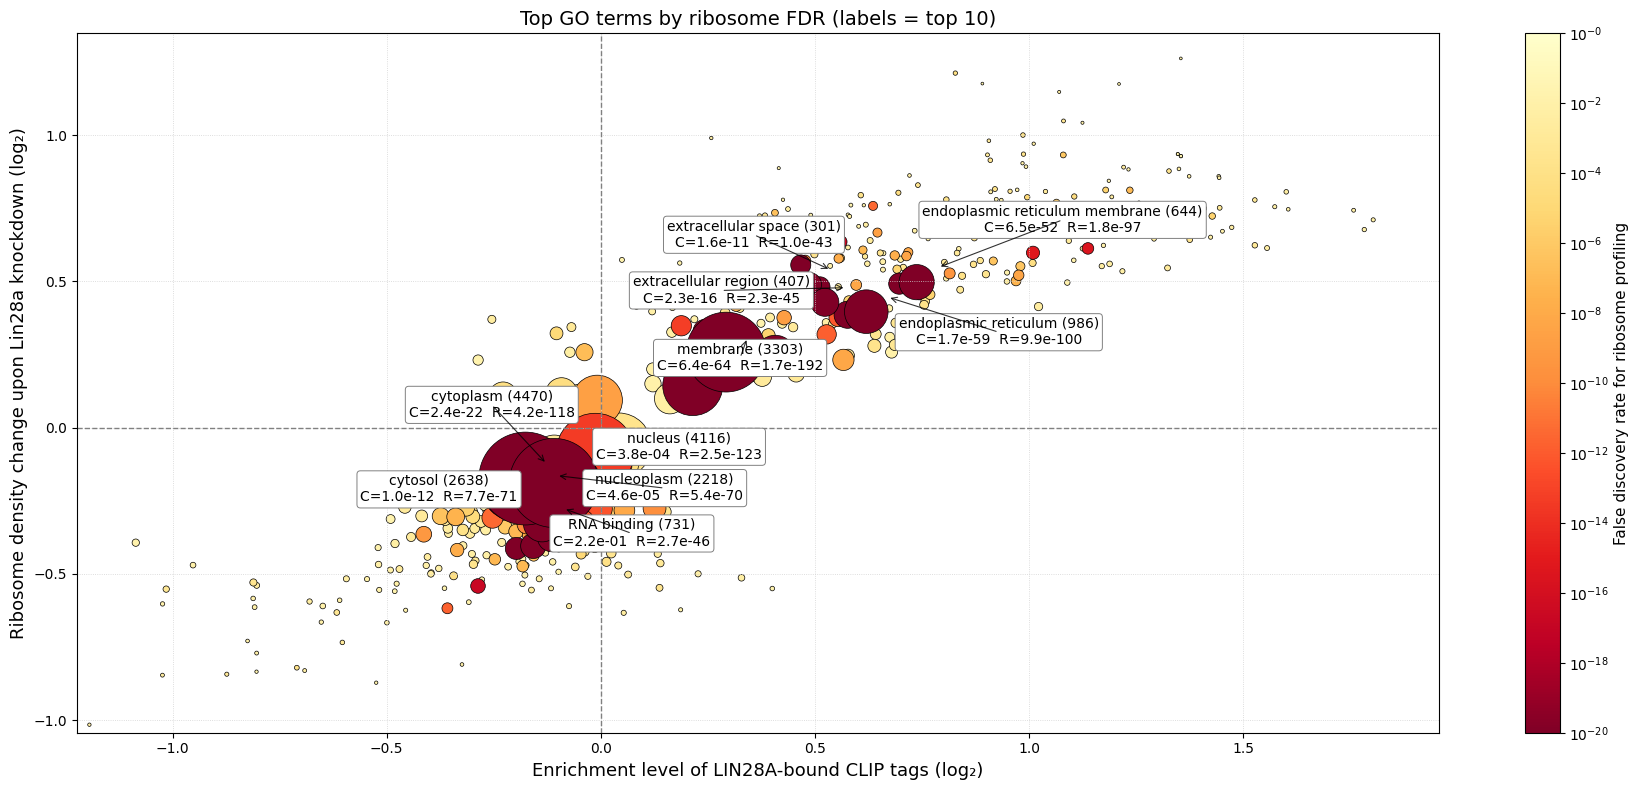

In [43]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(figsize=(18, 8))

# 산점도
sc = plt.scatter(
    df_top["clip_log2_centered"],
    df_top["rden_log2_centered"],
    s=df_top["genes"] * 1,
    c=df_top["fdr_rden"],
    norm=LogNorm(vmin=1e-20, vmax=1),
    cmap="YlOrRd_r",
    alpha=1,
    edgecolors="k",
    linewidths=0.5
)

# 범위 설정
x_min = df_top["clip_log2_centered"].quantile(0.01)
x_max = df_top["clip_log2_centered"].quantile(0.99)
y_min = df_top["rden_log2_centered"].quantile(0.01)
y_max = df_top["rden_log2_centered"].quantile(0.99)
plt.xlim(x_min - 0.2, x_max + 0.2)
plt.ylim(y_min - 0.2, y_max + 0.2)

# 기준선 및 격자
plt.axhline(0, linestyle="--", color="gray", linewidth=1)
plt.axvline(0, linestyle="--", color="gray", linewidth=1)
plt.grid(True, linestyle=":", linewidth=0.6, color="lightgray")

# 컬러바
cbar = plt.colorbar(sc)
log_ticks = [10**-i for i in range(0, 21, 2)]
tick_labels = [f"$10^{{-{i}}}$" for i in range(0, 21, 2)]
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(tick_labels)
cbar.set_label("False discovery rate for ribosome profiling", fontsize=11)

# 축 제목
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log₂)", fontsize=13)
plt.ylabel("Ribosome density change upon Lin28a knockdown (log₂)", fontsize=13)
plt.title("Top GO terms by ribosome FDR (labels = top 10)", fontsize=14)

# 텍스트 라벨 (초기 위치를 점에서 살짝 옮기고, adjust_text에서 강하게 밀어냄)
texts = []
for _, row in df_topten.iterrows():
    label = (
        f"{row['GO_name']} ({row['genes']})\n"
        f"C={row['fdr_clip']:.1e}  R={row['fdr_rden']:.1e}"
    )
    t = plt.text(
        row["clip_log2_centered"] + 0.05,   # x축 오른쪽으로 약간 이동
        row["rden_log2_centered"] + 0.05,   # y축 위로 약간 이동
        label,
        fontsize=10,
        ha='center',
        va='center',
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="gray", lw=0.7)
    )
    texts.append(t)

# 텍스트 조정 + 화살표 연결
adjust_text(
    texts,
    expand_text=(2.5, 2.5),
    expand_points=(3.0, 3.0),
    force_text=(0.7, 0.7),       # 텍스트 간 강한 repulsion
    force_points=(2.0, 2.0),     # 점과 텍스트 간 강하게 멀어지도록
    arrowprops=dict(
        arrowstyle="->",
        color="black",
        lw=0.8,
        alpha=0.8,
        relpos=(0.5, 0.5)  # 화살표 시작점 위치 (박스 중앙)
    ),
    only_move={'points': 'none', 'text': 'xy'},
    autoalign='xy',
    lim=1500
)

plt.tight_layout()
plt.show()


In [337]:
df_summary[["clip_log2", "rden_log2"]].describe()

,clip_log2,rden_log2
count,5997.000000,5997.000000
mean,-0.517520,-0.226470
std,0.549003,0.342572
min,-3.141623,-1.300037
25%,-0.852585,-0.460556
50%,-0.561019,-0.267711
75%,-0.194569,-0.032163
max,1.954934,1.414719


In [338]:
df_summary[["clip_log2", "rden_log2"]].describe()

,clip_log2,rden_log2
count,5997.000000,5997.000000
mean,-0.517520,-0.226470
std,0.549003,0.342572
min,-3.141623,-1.300037
25%,-0.852585,-0.460556
50%,-0.561019,-0.267711
75%,-0.194569,-0.032163
max,1.954934,1.414719


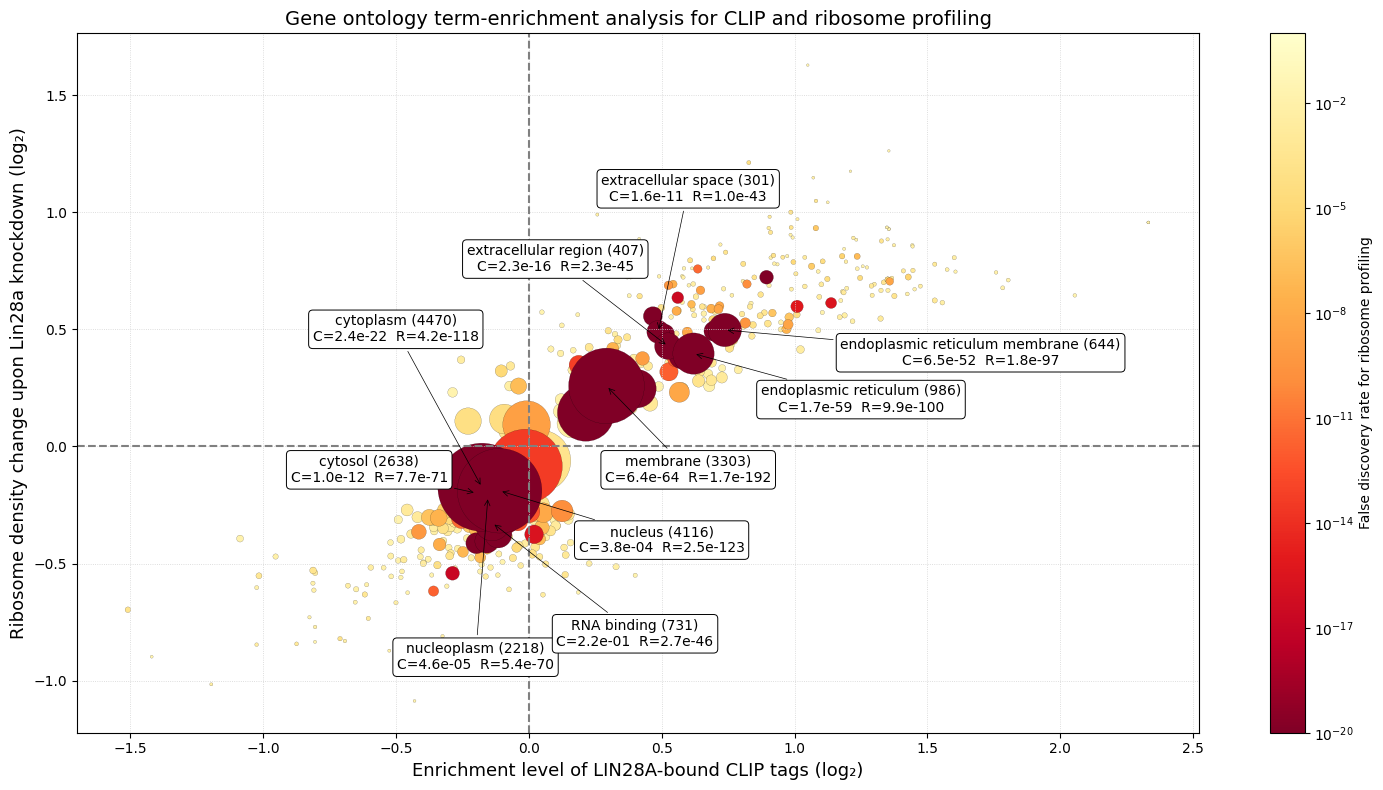

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(figsize=(15, 8))

# 산점도
sc = plt.scatter(
    df_top["clip_log2_centered"],
    df_top["rden_log2_centered"],
    s=df_top["genes"] * 0.9,
    c=df_top["fdr_rden"],
    norm=LogNorm(vmin=1e-20, vmax=1),
    cmap="YlOrRd_r",
    edgecolors="k",
    linewidths=0.1
)

# 라벨 수동 배치 좌표 지정
manual_labels = {
    "cytoplasm": (-0.5, 0.5),
    "cytosol": (-0.6, -0.1),
    "nucleus": (0.5, -0.4),
    "nucleoplasm": (-0.2, -0.9),
    "RNA binding": (0.4, -0.8),
    "membrane": (0.6, -0.1),
    "endoplasmic reticulum": (1.25, 0.2),
    "endoplasmic reticulum membrane": (1.7, 0.4),
    "extracellular region": (0.1, 0.8),
    "extracellular space": (0.6, 1.1),
}

# 텍스트 박스 수동 배치
for _, row in df_topten.iterrows():
    name = row["GO_name"]
    if name in manual_labels:
        x_text, y_text = manual_labels[name]
        plt.annotate(
            f"{name} ({row['genes']})\nC={row['fdr_clip']:.1e}  R={row['fdr_rden']:.1e}",
            xy=(row["clip_log2_centered"], row["rden_log2_centered"]),
            xytext=(x_text, y_text),
            textcoords='data',
            fontsize=10,
            ha='center',
            va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.7),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
        )

# 컬러바, 격자, 제목, 축 설정 등
plt.axhline(0, linestyle="--", color="gray")
plt.axvline(0, linestyle="--", color="gray")
plt.grid(True, linestyle=":", linewidth=0.6, color="lightgray")

plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log₂)", fontsize=13)
plt.ylabel("Ribosome density change upon Lin28a knockdown (log₂)", fontsize=13)
plt.title("Gene ontology term-enrichment analysis for CLIP and ribosome profiling", fontsize=14)

plt.colorbar(sc, label="False discovery rate for ribosome profiling")
plt.tight_layout()
plt.show()
